# Analyse Std Dev Markit France

In [779]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [780]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 06.csv")

data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

C:\Users\rmolli\AppData\Local\Temp\ipykernel_62536\3609466979.py:2: DtypeWarning: Columns (40,41,47,48,49,50,51,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"Data Mark-It Raw 06.csv")


In [781]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

## France Base Load Analysis

### Analyse Quarters

In [782]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Markit Participants', '% NaN'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100,2)
      
recap_Fra_quarters.dropna(inplace = True, axis  ='columns' )
recap_Fra_quarters

,2022-09-30 00:00:00,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,
Min,0.23,0.45,0.61,0.58,0.66,0.34,3.42,2.33,2.06,0.3,1.17,1.28,0.88,0.35,2.44,1.61,1.75,0.29,7.64,8.69
Average,2.52,7.19,6.94,1.94,3.12,2.84,9.4,4.31,4.73,4.62,7.09,6.88,6.92,3.46,6.82,6.5,4.84,3.95,7.64,8.69
Max,9.88,36.53,25.04,5.82,6.69,8.36,19.31,6.46,9.69,11.19,14.9,11.68,11.28,9.24,12.74,13.18,11.1,8.91,7.64,8.69
Markit Participants,14.61,14.52,13.22,12.68,11.75,12.43,10.85,10.7,10.55,11.37,8.8,8.65,7.88,8.75,5.78,5.75,5.05,5.63,3.92,3.92
% NaN,2.44,1.64,2.44,2.44,2.44,1.64,2.44,4.88,4.88,3.28,9.76,9.76,7.5,11.67,37.5,37.5,60.0,46.67,97.5,97.5


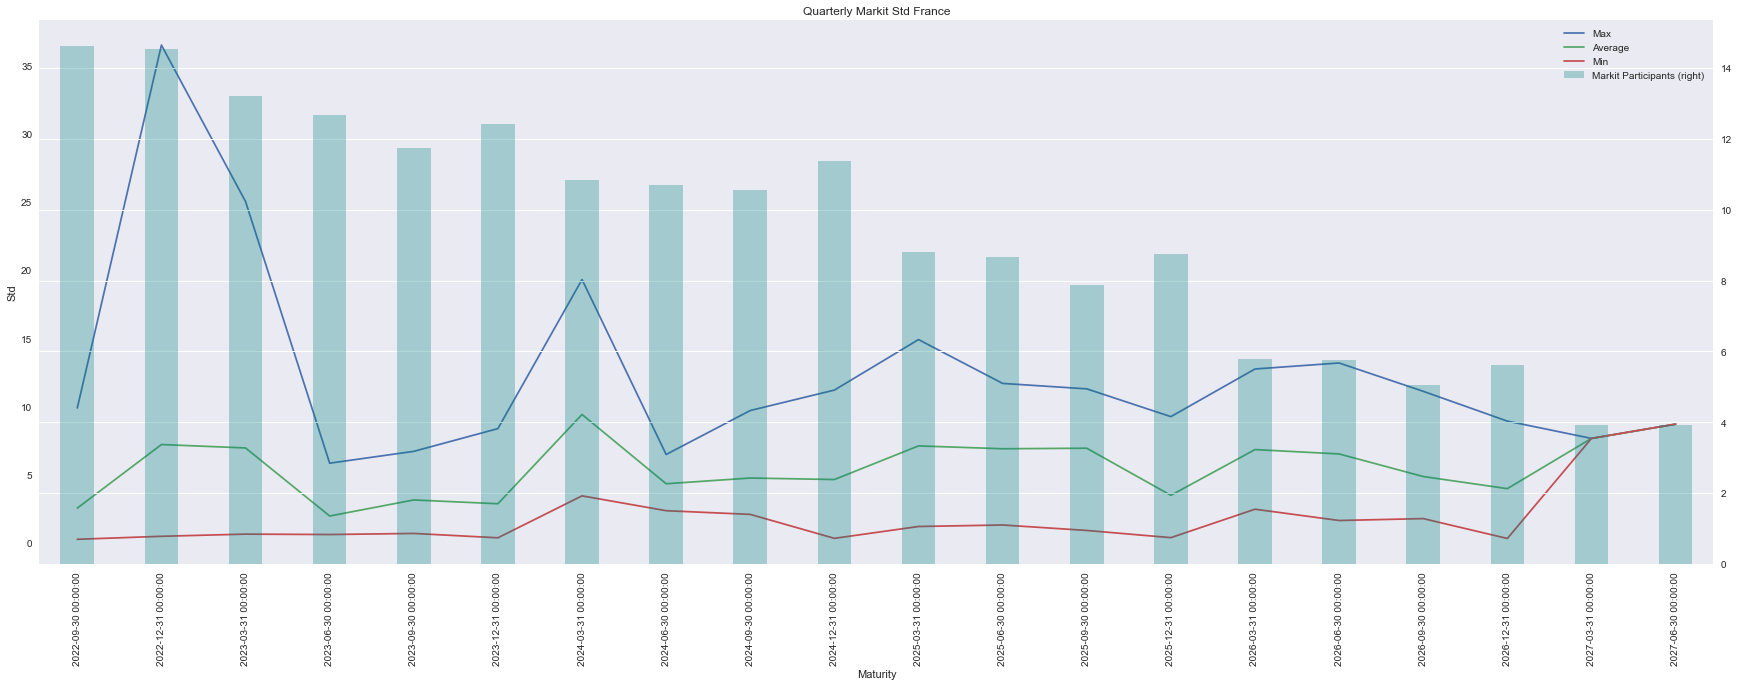

In [783]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std France")

ax1=recap_Fra_quarters.loc['Max'].plot(legend = True)
ax1=recap_Fra_quarters.loc['Average'].plot(legend = True)
ax1= recap_Fra_quarters.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Fra_quarters.loc['Markit Participants'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [784]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

1.85
12.42
5.52


In [785]:
quarters_ST = recap_Fra_quarters.columns[:5] 
quarters_LT = recap_Fra_quarters.columns[5:] 

In [786]:
print(round(recap_Fra_quarters.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_ST].mean(),2))

0.51
16.79
4.34


In [787]:
print(round(recap_Fra_quarters.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_LT].mean(),2))

2.3
10.96
5.91


### Analyse Months

In [788]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Month') ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices', "% NaN"])
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
      recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
      recap_Fra_months.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100, 2)
      
recap_Fra_months.dropna(inplace = True, axis='columns')
recap_Fra_months

,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,...,2026-05-31 00:00:00,2026-06-30 00:00:00,2026-07-31 00:00:00,2026-08-31 00:00:00,2026-09-30 00:00:00,2026-10-31 00:00:00,2026-11-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,0.09,0.59,0.23,2.96,3.87,0.45,5.5,6.41,0.61,3.03,...,2.13,1.61,1.16,1.83,1.75,2.8,2.49,0.29,7.64,8.69
Average,1.32,2.21,2.52,23.43,12.65,7.19,11.67,9.94,6.94,4.77,...,5.97,6.5,5.43,5.33,4.84,4.27,3.91,3.95,7.64,8.69
Max,4.89,10.25,9.88,54.6,29.56,36.53,27.39,19.15,25.04,7.24,...,10.22,13.18,8.98,7.28,11.1,7.43,7.96,8.91,7.64,8.69
Nb of Prices,13.2,14.24,14.61,13.05,12.9,14.52,12.65,12.3,13.22,11.95,...,5.45,5.75,4.75,4.75,5.05,4.75,4.75,5.63,3.92,3.92
% NaN,0.0,4.76,2.44,4.76,4.76,1.64,4.76,4.76,2.44,4.76,...,45.0,37.5,65.0,65.0,60.0,65.0,65.0,46.67,97.5,97.5


In [789]:
data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== '2023-05-31 00:00:00') ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== '2023-05-31 00:00:00') ,"ns1:StandardDeviationPrice"].shape[0]

0.047619047619047616

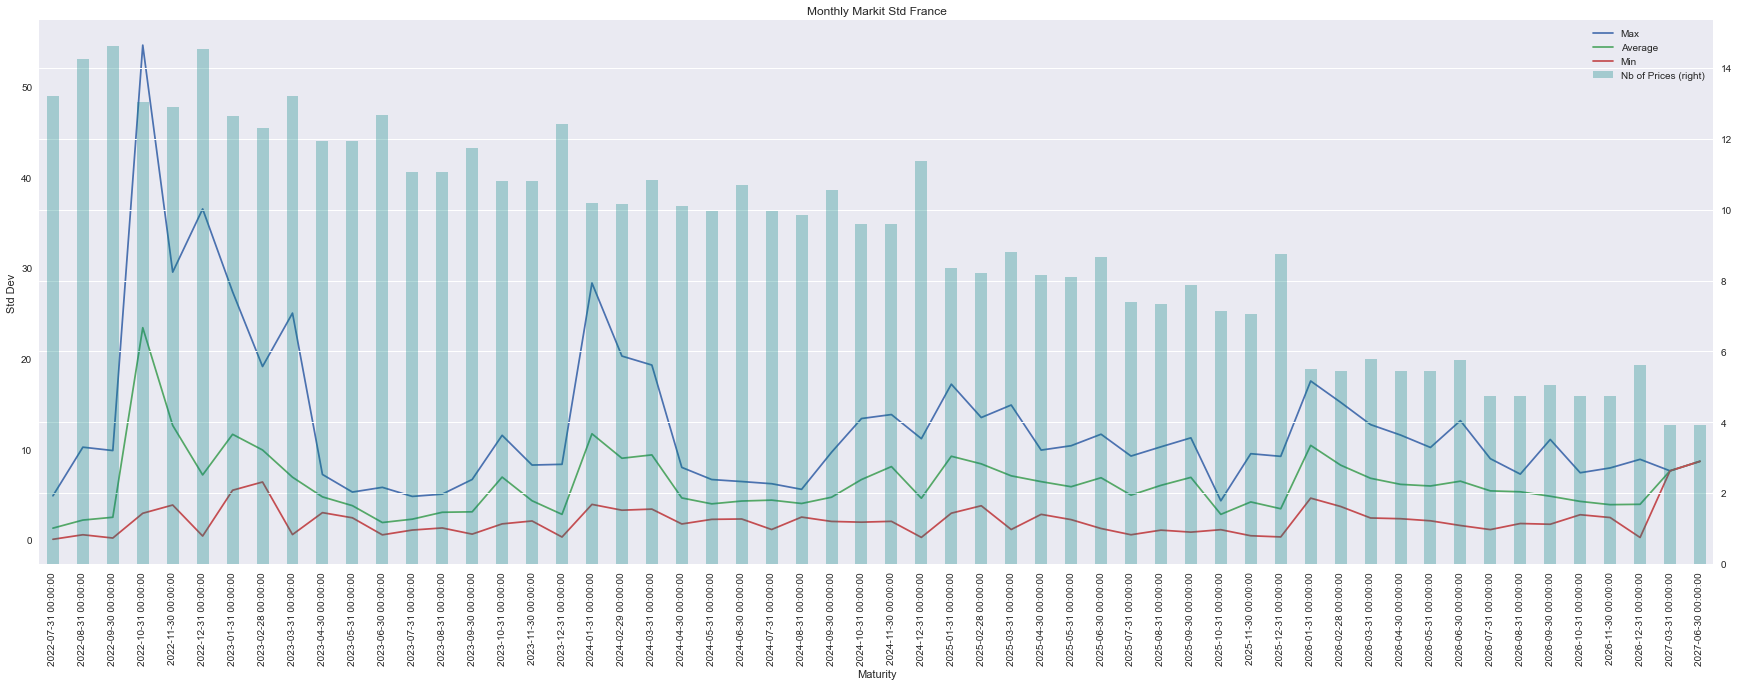

In [790]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std France")

recap_Fra_months.loc['Max'].plot(legend = True)
recap_Fra_months.loc['Average'].plot(legend = True)
ax1= recap_Fra_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")
ax1.legend(['Max', 'Average','Min'])

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar', secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [791]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

2.21
12.67
6.2


In [792]:
quarters_ST = recap_Fra_months.columns[:5] 
quarters_LT = recap_Fra_months.columns[5:] 

In [793]:
print(round(recap_Fra_months.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_ST].mean(),2))

1.55
21.84
8.43


In [794]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

2.27
11.77
5.98


### Analyse Years

In [795]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Year') ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices', '% NaN'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
      recap_Fra_years.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_years.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100, 2)
 
recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,0.34,0.3,0.35,0.29
Average,2.84,4.62,3.46,3.95
Max,8.36,11.19,9.24,8.91
Nb of Prices,12.43,11.37,8.75,5.63
% NaN,1.64,3.28,11.67,46.67


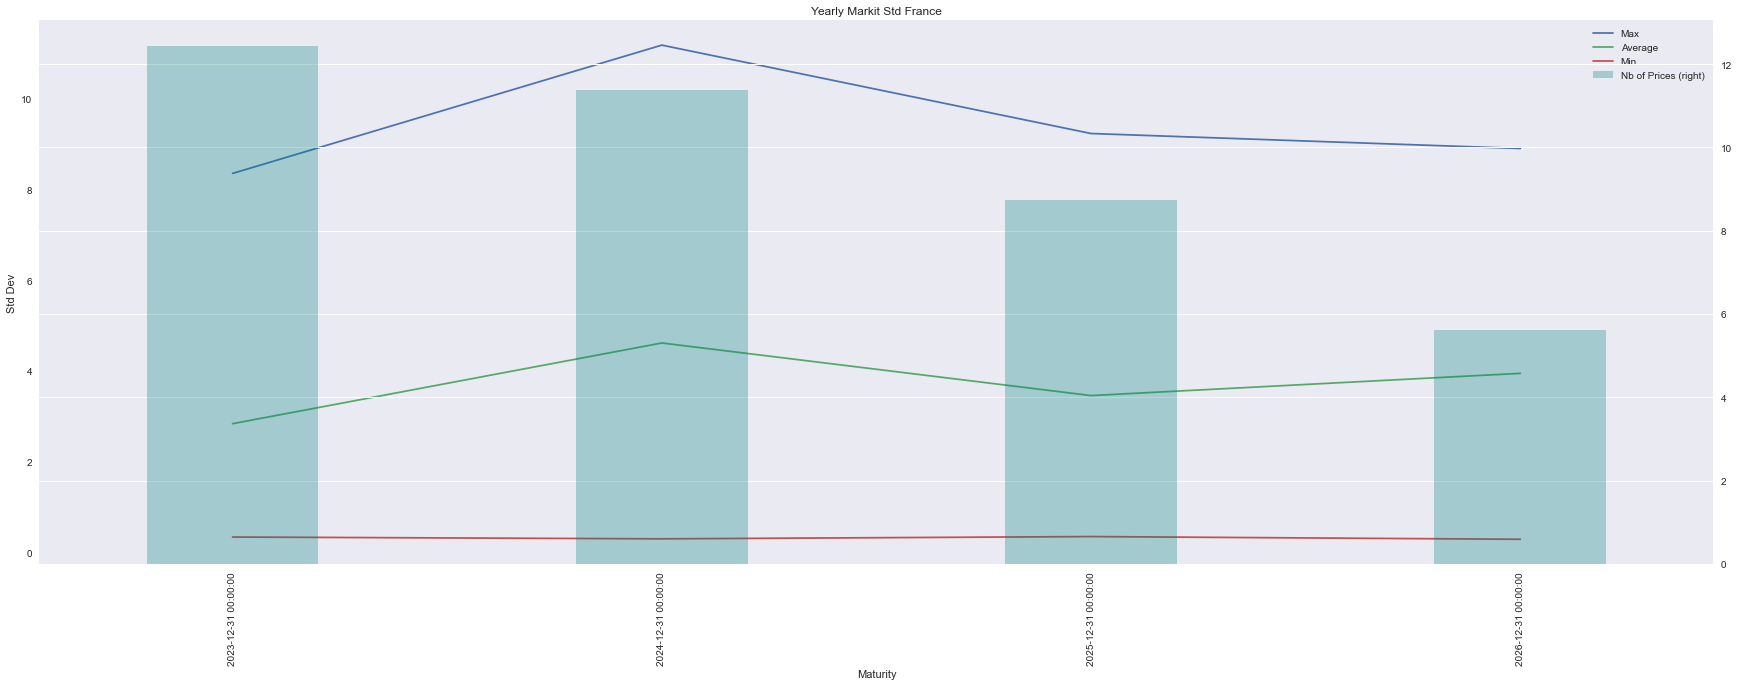

In [796]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France")

recap_Fra_years.loc['Max'].plot(legend = True)
recap_Fra_years.loc['Average'].plot(legend = True)
ax1= recap_Fra_years.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)

In [797]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

0.32
9.43
3.72


In [798]:
quarters_ST = recap_Fra_years.columns[0] 
quarters_LT = recap_Fra_years.columns[0:] 

In [799]:
print(round(recap_Fra_years.loc["Min", quarters_ST],2))
print(round(recap_Fra_years.loc["Max", quarters_ST],2))
print(round(recap_Fra_years.loc["Average", quarters_ST],2))

0.34
8.36
2.84


In [800]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

0.32
9.43
3.72


## France Peaks Analysis

### Analyse Quarters

In [801]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Fra_quarters.dropna(inplace = True, axis='columns' )
recap_Fra_quarters

,2022-09-30 00:00:00,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,
Min,1.26,1.22,5.11,1.81,3.51,0.77,7.5,5.49,6.16,0.43,2.05,2.3,2.56,0.65,15.47,11.76,16.9,24.19,21.33,27.39
Average,6.91,27.9,12.8,4.98,8.41,10.05,19.42,12.89,16.6,14.92,23.37,15.15,16.06,13.79,26.73,17.11,26.06,31.01,21.33,27.39
Max,15.05,118.01,43.86,11.65,30.27,45.82,36.27,29.1,30.67,37.52,47.37,25.96,27.54,31.54,40.78,30.58,32.81,38.18,21.33,27.39
Nb of Prices,13.3,13.18,10.12,9.82,9.57,10.68,8.88,8.88,8.88,9.73,8.53,8.45,7.1,7.68,5.95,5.88,4.13,4.35,3.53,3.53


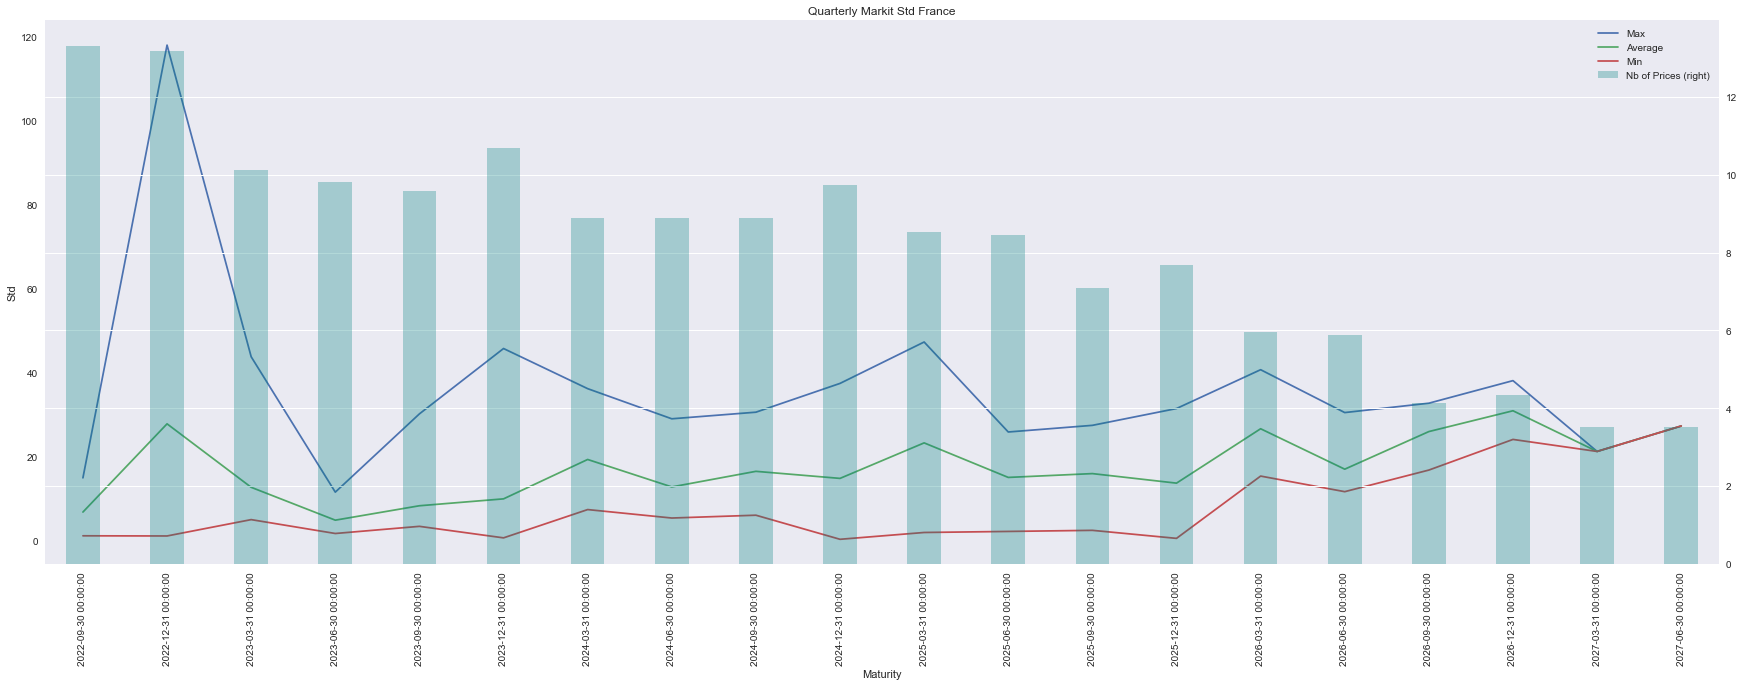

In [802]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std France")

recap_Fra_quarters.loc['Max'].plot(legend = True)
recap_Fra_quarters.loc['Average'].plot(legend = True)
ax1= recap_Fra_quarters.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")
ax1.legend(['Max', 'Average','Min'])

ax2 = recap_Fra_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)

In [803]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

7.89
36.08
17.64


In [804]:
quarters_ST = recap_Fra_quarters.columns[:5] 
quarters_LT = recap_Fra_quarters.columns[5:] 

In [805]:
print(round(recap_Fra_quarters.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_ST].mean(),2))

2.58
43.77
12.2


In [806]:
print(round(recap_Fra_quarters.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_LT].mean(),2))

9.66
33.52
19.46


### Analyse Months

In [807]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_months.dropna(inplace = True, axis='columns' )
recap_Fra_months

,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,...,2026-02-28 00:00:00,2026-03-31 00:00:00,2026-04-30 00:00:00,2026-05-31 00:00:00,2026-06-30 00:00:00,2026-07-31 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,0.07,1.23,1.26,35.71,15.77,1.22,9.55,12.3,5.11,4.81,...,13.54,15.47,11.11,10.96,11.76,14.22,16.9,24.19,21.33,27.39
Average,4.38,7.3,6.91,78.99,47.08,27.9,32.79,24.68,12.8,7.15,...,17.22,26.73,14.41,13.23,17.11,14.42,26.06,31.01,21.33,27.39
Max,13.89,13.73,15.05,172.59,139.52,118.01,102.06,57.93,43.86,12.78,...,19.34,40.78,16.26,14.9,30.58,14.63,32.81,38.18,21.33,27.39
Nb of Prices,11.35,13.25,13.3,12.65,12.55,13.18,10.15,10.0,10.12,9.1,...,5.3,5.95,5.2,5.2,5.88,4.47,4.13,4.35,3.53,3.53


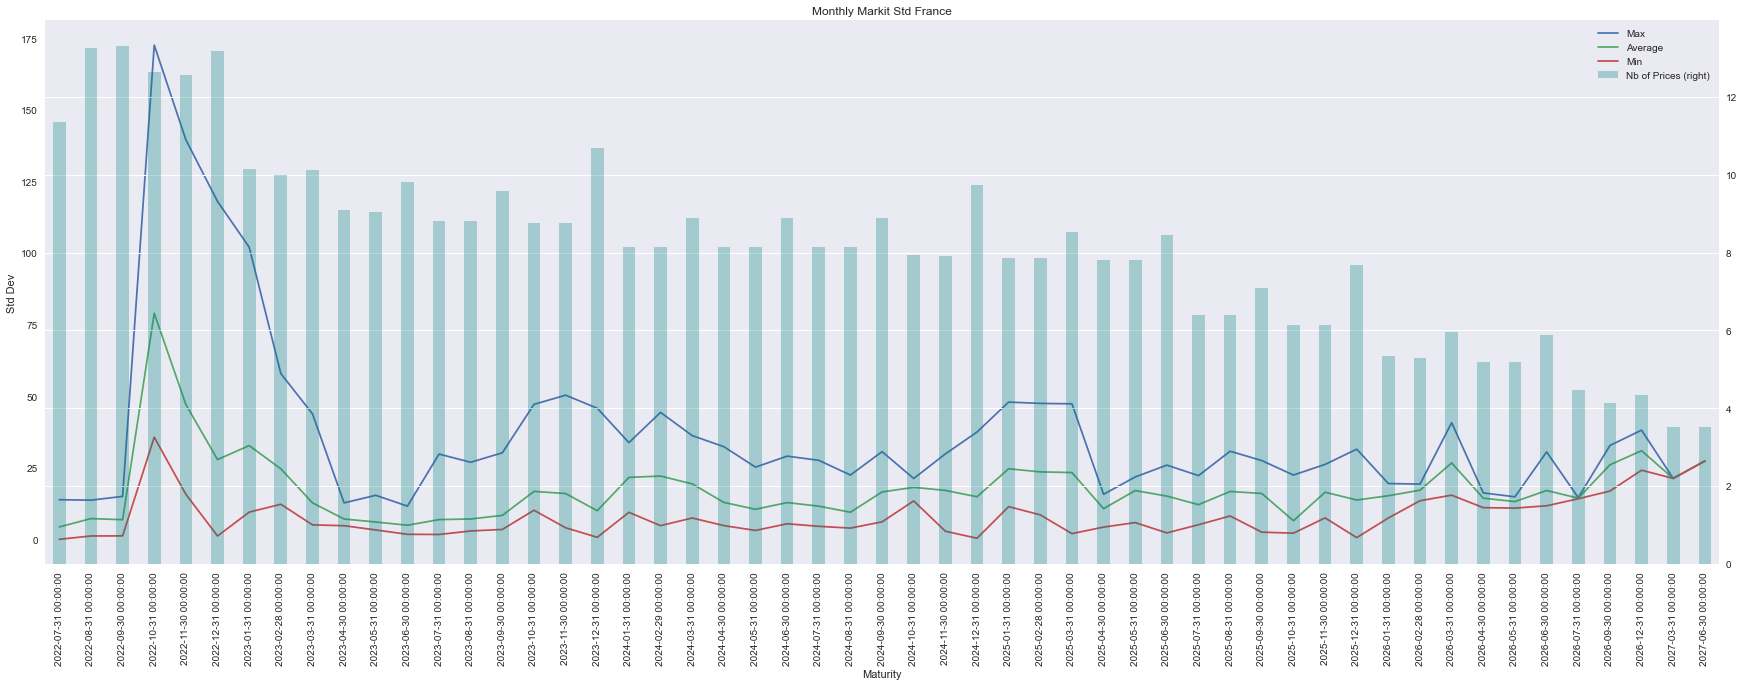

In [808]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std France")

recap_Fra_months.loc['Max'].plot(legend = True)
recap_Fra_months.loc['Average'].plot(legend = True)
ax1= recap_Fra_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [809]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

7.88
36.99
17.64


In [810]:
quarters_ST = recap_Fra_months.columns[:5] 
quarters_LT = recap_Fra_months.columns[5:] 

In [811]:
print(round(recap_Fra_months.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_ST].mean(),2))

10.81
70.96
28.93


In [812]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

7.58
33.46
16.46


### Analyse Years

In [813]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,0.77,0.43,0.65,24.19
Average,10.05,14.92,13.79,31.01
Max,45.82,37.52,31.54,38.18
Nb of Prices,10.68,9.73,7.68,4.35


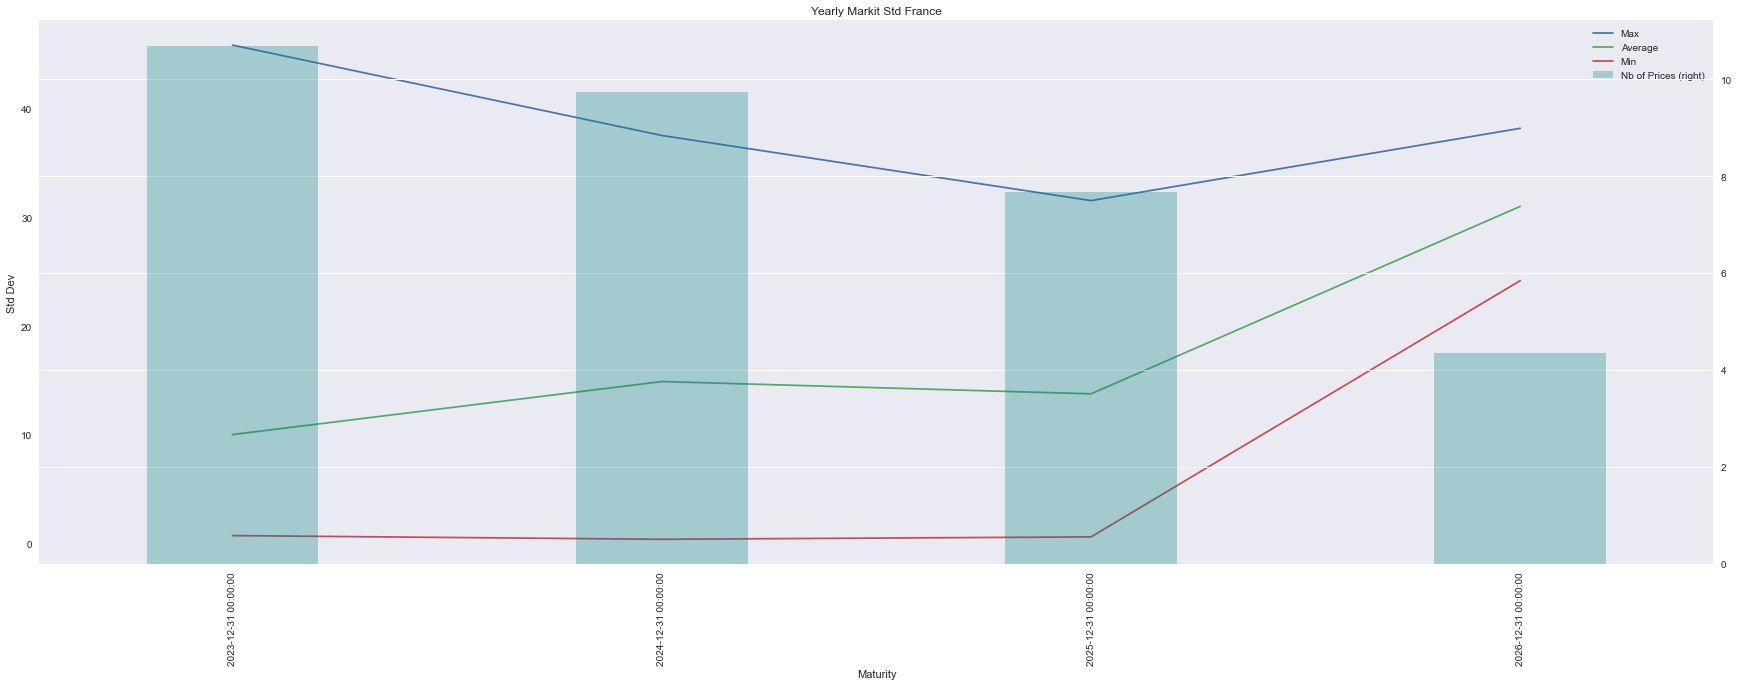

In [814]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France")

recap_Fra_years.loc['Max'].plot(legend = True)
recap_Fra_years.loc['Average'].plot(legend = True)
ax1= recap_Fra_years.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True );

In [815]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

6.51
38.26
17.44
